In [ ]:
# 1. Initial Setup
import pandas as pd
import time

print("Starting the scraping process from Box Office Mojo...")

# Prepare an empty list to hold the DataFrames from each page
list_of_dataframes = []


Starting the scraping process from Box Office Mojo...


In [ ]:
# 2. Multi-page Scraping Logic with pd.read_html()
# The data is on 5 pages, with an offset of 200 per page (0, 200, 400, 600, 800)
offsets = range(0, 1000, 200)

for offset in offsets:
    # If the offset is 0, the URL doesn't need the offset parameter
    if offset == 0:
        page_url = "https://www.boxofficemojo.com/chart/top_lifetime_gross/"
    else:
        page_url = f"https://www.boxofficemojo.com/chart/top_lifetime_gross/?offset={offset}"

    print(f"Scraping data from page with offset: {offset}...")

    try:
        # pd.read_html() reads ALL tables on the page and returns them as a list of DataFrames
        tables_on_page = pd.read_html(page_url)

        # The table we want is the first one (index 0)
        df_from_page = tables_on_page[0]

        # Add the DataFrame from this page to our main list
        list_of_dataframes.append(df_from_page)

        # Pause for a moment to be respectful to the server
        time.sleep(2)

    except Exception as e:
        print(f"Failed to scrape data from offset {offset}: {e}")

print("\n--- Scraping Process Complete! ---")

Scraping data from page with offset: 0...
Scraping data from page with offset: 200...
Scraping data from page with offset: 400...
Scraping data from page with offset: 600...
Scraping data from page with offset: 800...

--- Scraping Process Complete! ---


In [ ]:
# 3. Combine all DataFrames into one
# pd.concat will merge all DataFrames in the list into a single large table
df_movies = pd.concat(list_of_dataframes)

print(f"Total movies successfully scraped: {len(df_movies)}")

Total movies successfully scraped: 1000


In [ ]:
# 4. Data Cleaning
print("\nStarting the data cleaning process...")

# Rename columns for easier use
df_movies.rename(columns={'Lifetime Gross': 'Worldwide Gross', 'Title': 'Movie Title'}, inplace=True)

# Clean the 'Worldwide Gross' column
# Remove '$' and ',' then convert the data type to a number (integer)
df_movies['Worldwide Gross'] = df_movies['Worldwide Gross'].str.replace('$', '').str.replace(',', '').astype(int)

# Clean the 'Year' column
# Convert the data type to an integer
df_movies['Year'] = df_movies['Year'].astype(int)

# Select the relevant columns for the analysis
df_movies_clean = df_movies[['Rank', 'Movie Title', 'Worldwide Gross', 'Year']]


Starting the data cleaning process...


In [ ]:
# 5. Display the final result
print("\nClean DataFrame of movies, ready for analysis:")
df_movies_clean.info()

print("\nTop 5 Highest-Grossing Films:")
print(df_movies_clean.head())

print("\nLast 5 Films in the list:")
print(df_movies_clean.tail())



Clean DataFrame of movies, ready for analysis:
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 199
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             1000 non-null   int64 
 1   Movie Title      1000 non-null   object
 2   Worldwide Gross  1000 non-null   int64 
 3   Year             1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 39.1+ KB

Top 5 Highest-Grossing Films:
   Rank                                 Movie Title  Worldwide Gross  Year
0     1  Star Wars: Episode VII - The Force Awakens        936662225  2015
1     2                           Avengers: Endgame        858373000  2019
2     3                     Spider-Man: No Way Home        814866759  2021
3     4                                      Avatar        785221649  2009
4     5                           Top Gun: Maverick        718732821  2022

Last 5 Films in the list:
     Rank         Movie

In [ ]:
# 1. Setup for Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the visualization style for a modern look
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
print("Visualization libraries are ready.")

Visualization libraries are ready.


In [ ]:
# --- ANALYSIS 1: Descriptive Statistics ---
# Let's look at the basic statistical summary of our data (mean, median, etc.)
print("\n--- Descriptive Statistics ---")
# Displaying in a more readable format
print(df_movies_clean[['Worldwide Gross', 'Year']].describe().to_string())


--- Descriptive Statistics ---
       Worldwide Gross       Year
count     1.000000e+03  1000.0000
mean      1.765070e+08  2006.4490
std       1.102741e+08    12.6732
min       8.608951e+07  1937.0000
25%       1.068729e+08  2000.0000
50%       1.384891e+08  2009.0000
75%       2.005440e+08  2016.0000
max       9.366622e+08  2025.0000




--- Finding the Top 10 Highest-Grossing Films of All Time ---


/tmp/ipython-input-11-4020864041.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


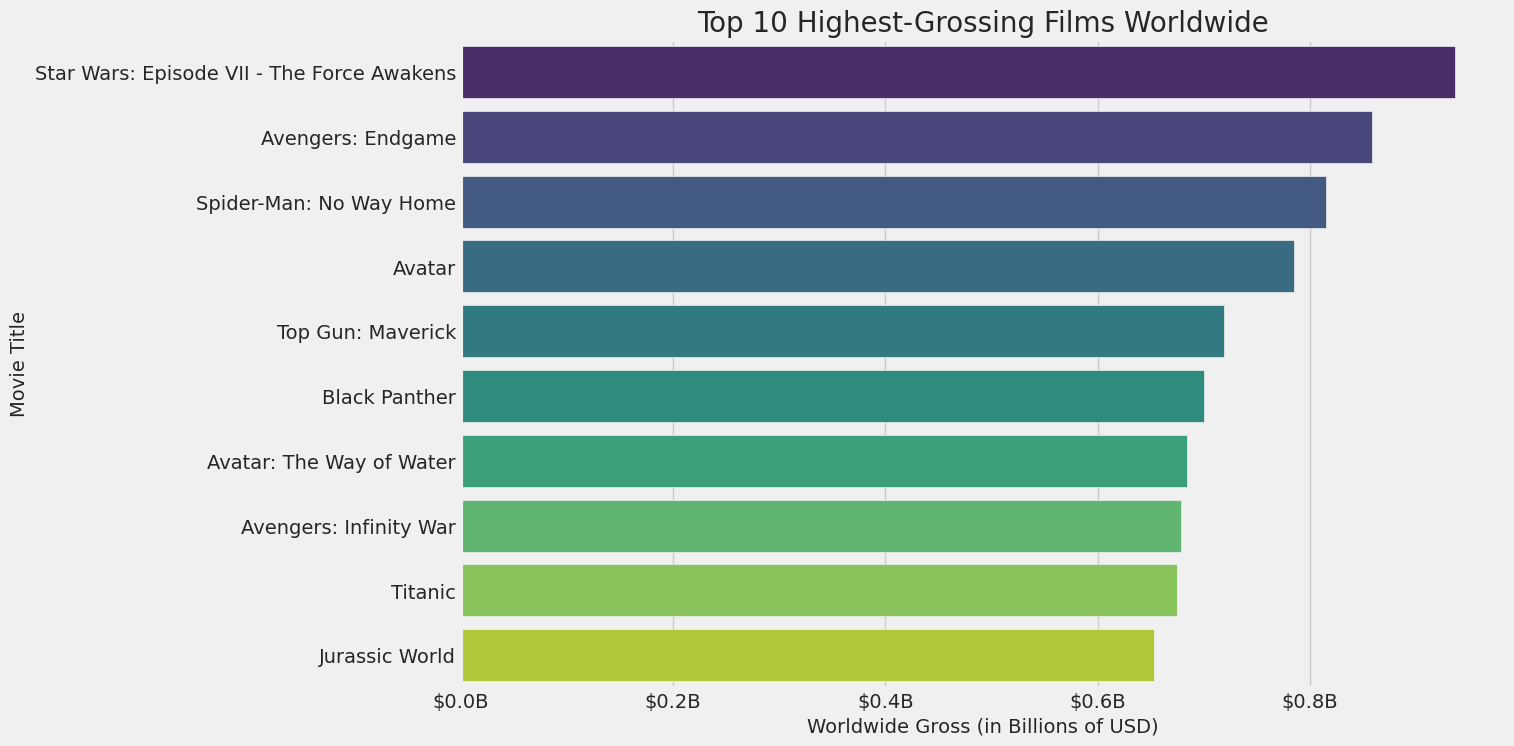

In [ ]:
# --- ANALYSIS 2: Top 10 Highest-Grossing Films ---
print("\n\n--- Finding the Top 10 Highest-Grossing Films of All Time ---")
top_10_films = df_movies_clean.sort_values(by='Worldwide Gross', ascending=False).head(10)

plt.figure(figsize=(12, 8)) # Setting the figure size
ax = sns.barplot(
    x='Worldwide Gross',
    y='Movie Title',
    data=top_10_films,
    palette='viridis' # Choosing a color palette
)

ax.set_title('Top 10 Highest-Grossing Films Worldwide', fontsize=20)
ax.set_xlabel('Worldwide Gross (in Billions of USD)', fontsize=14)
ax.set_ylabel('Movie Title', fontsize=14)

# Formatting the x-axis numbers for better readability
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"${x/1e9:.1f}B"))
plt.show()



--- Analyzing the Trend of Top-Grossing Films by Year ---


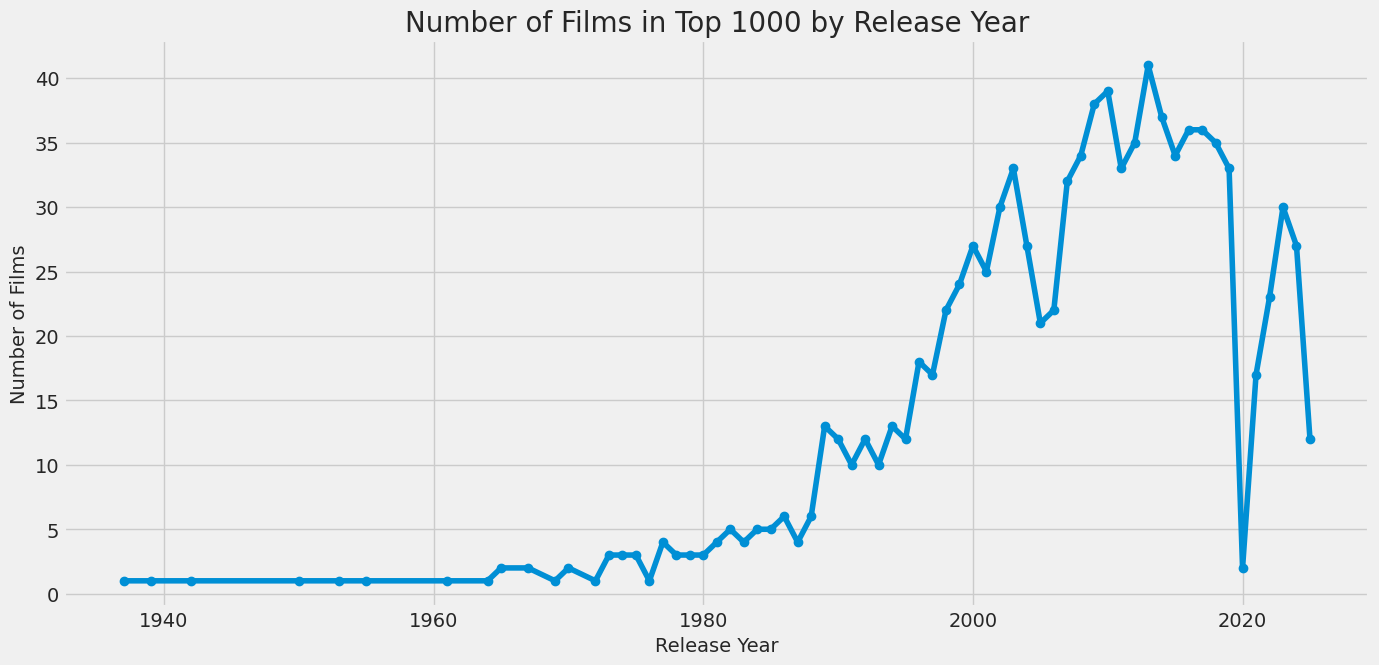

In [ ]:
# --- ANALYSIS 3: Number of Top-Grossing Films by Release Year ---
print("\n\n--- Analyzing the Trend of Top-Grossing Films by Year ---")
film_per_tahun = df_movies_clean['Year'].value_counts().sort_index()

plt.figure(figsize=(15, 7))
film_per_tahun.plot(kind='line', marker='o', linestyle='-')

plt.title('Number of Films in Top 1000 by Release Year', fontsize=20)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of Films', fontsize=14)
plt.grid(True)
plt.show()



--- Viewing the Distribution of Film Revenue ---


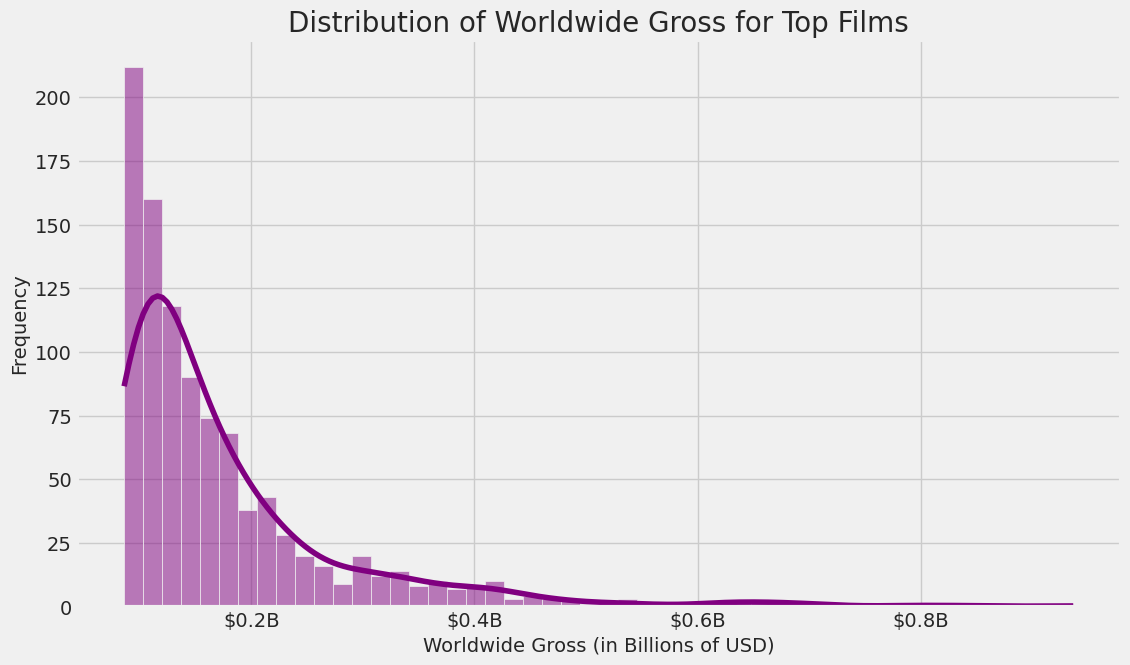

In [ ]:
# --- ANALYSIS 4: Distribution of Film Revenue ---
print("\n\n--- Viewing the Distribution of Film Revenue ---")
plt.figure(figsize=(12, 7))
sns.histplot(df_movies_clean['Worldwide Gross'], bins=50, kde=True, color='purple')

plt.title('Distribution of Worldwide Gross for Top Films', fontsize=20)
plt.xlabel('Worldwide Gross (in Billions of USD)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"${x/1e9:.1f}B"))
plt.show()

In [ ]:
# 1. Setup for Linear Regression
from sklearn.linear_model import LinearRegression
import numpy as np

print("Scikit-learn library for regression is ready.")

Scikit-learn library for regression is ready.



Linear regression model has been trained successfully.
Coefficient (Slope): 1816566.24
Intercept: -3468340548.24


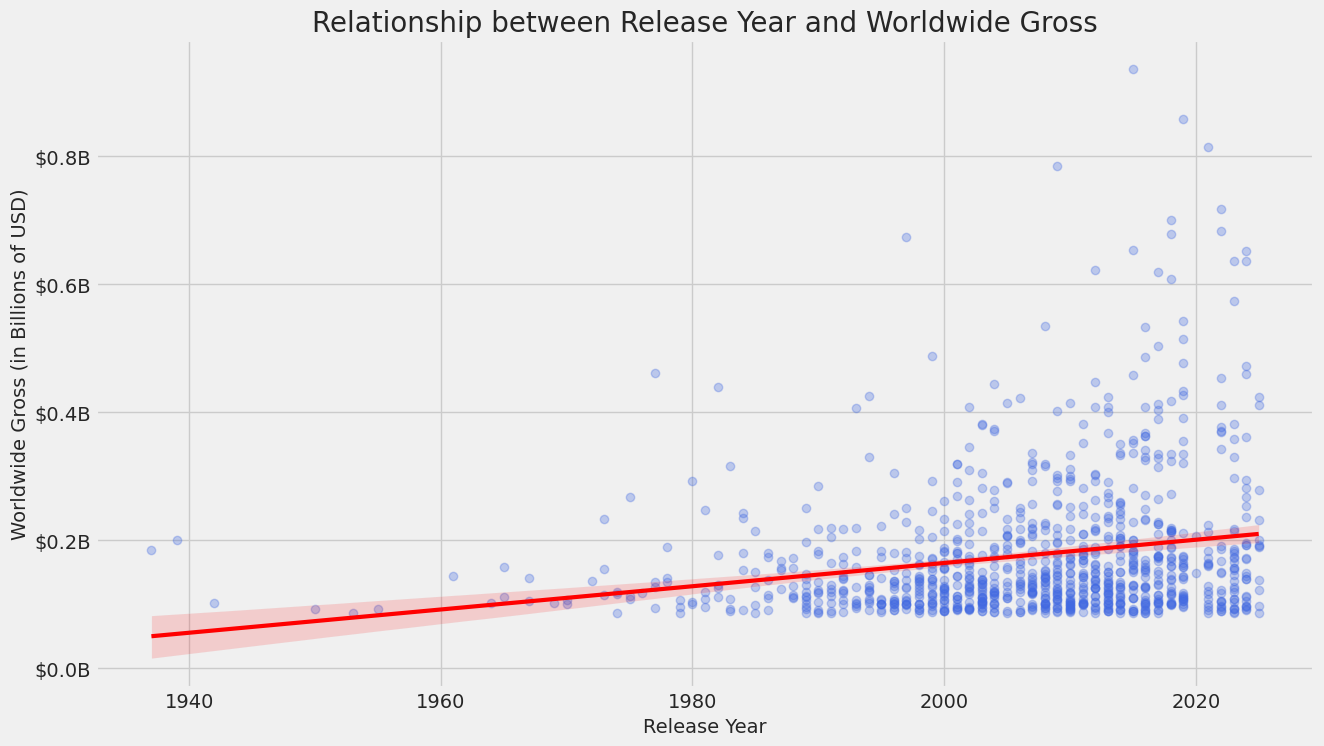

In [ ]:
# --- ANALYSIS 5: LINEAR REGRESSION MODELING ---
# Objective: Model the relationship between Release Year (X) and Worldwide Gross (Y)

# 2. Prepare the data for the model
# Scikit-learn's model requires X to be in a 2D format, so we need to reshape it
X = df_movies_clean['Year'].values.reshape(-1, 1)
y = df_movies_clean['Worldwide Gross'].values

# 3. Create and train (fit) the linear regression model
model = LinearRegression()
model.fit(X, y)

print("\nLinear regression model has been trained successfully.")
# Print the coefficient: how much Y changes if X increases by 1 unit
print(f"Coefficient (Slope): {model.coef_[0]:.2f}")
# Print the intercept: the value of Y when X = 0
print(f"Intercept: {model.intercept_:.2f}")

# 4. Create Visualization: Scatter Plot with Regression Line
plt.figure(figsize=(14, 8))

# Seaborn has a very convenient 'regplot' function for this
# It will create a scatter plot and automatically calculate and draw the regression line
sns.regplot(
    x='Year',
    y='Worldwide Gross',
    data=df_movies_clean,
    scatter_kws={'alpha':0.3, 'color':'royalblue'}, # Making the scatter points more transparent
    line_kws={'color':'red', 'linewidth':3} # Making the regression line thick and red
)

plt.title('Relationship between Release Year and Worldwide Gross', fontsize=20)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Worldwide Gross (in Billions of USD)', fontsize=14)

# Format the Y-axis for better readability
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, loc: f"${y/1e9:.1f}B"))

plt.show()